<a href="https://colab.research.google.com/github/cse0518/cse0518/blob/master/MLP_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2.3.0
4423680/4422102 [==============================] - 0s 0us/step


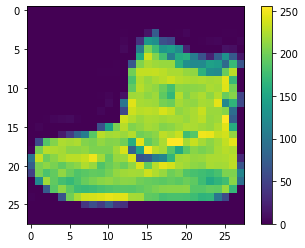

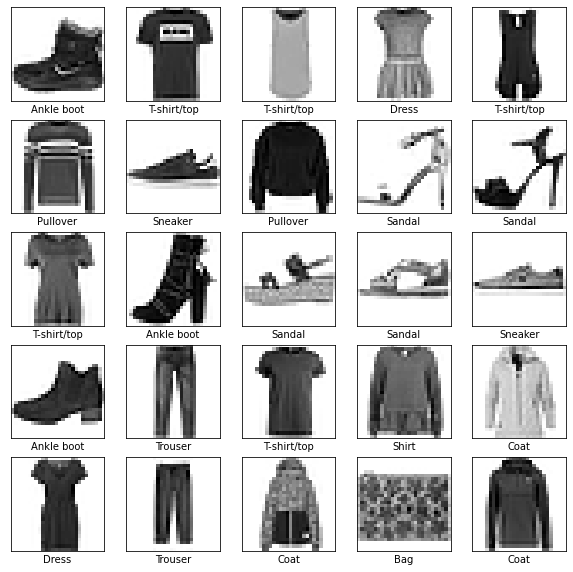

In [2]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [3]:
# 문제-1 마지막에 클래스를 구분할 수 있는 레이어를 추가해주세요
# 추가 점수: 현재 모델은 0.88 +- 0.02 정도의 정확도를 가지고 있습니다
# 모델의 평가 점수를 0.9이상으로 만들어 주세요
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

- *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
- *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [4]:
# 문제-2 optimizer loss, metrices를 설정해주세요
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2317 - accuracy: 0.9124
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2243 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2187 - accuracy: 0.9173
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9205
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2052 - accuracy: 0.9231
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2012 - accuracy: 0.9255
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1953 - accuracy: 0.9270
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1897 - accuracy: 0.9284
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1837 - accuracy: 0.9309
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.181

In [10]:
# 문제-3 모델을 평가할 수있는 코드를 작성해주세요 -> test data와 test label로
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print(test_loss, test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8901
0.35854190587997437 0.8901000022888184


In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# A prediction is an array of 10 numbers. 
# They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value
np.argmax(predictions[0])

# prediction label
test_labels[0]

9

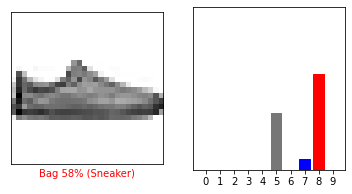

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

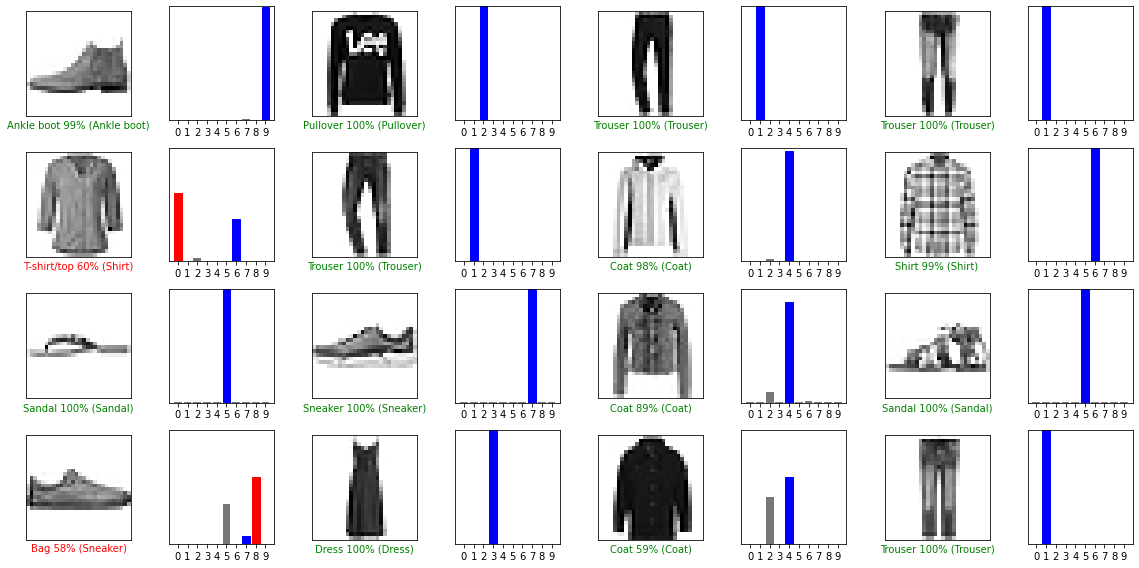

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[5.4975269e-12 1.0938789e-15 8.8524640e-14 5.9620535e-14 1.5768631e-15
  1.5578534e-07 7.4681355e-12 1.8474510e-03 7.6023216e-13 9.9815232e-01]]


9

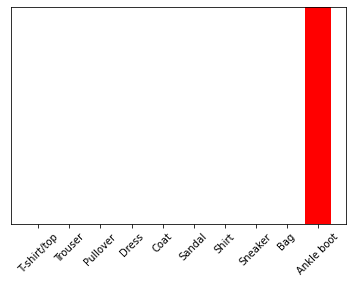

In [ ]:
img = test_images[428]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])